In [10]:
import matplotlib.pyplot as plt
import pandas
import re
from pathlib import Path
import numpy as np
import random

In [3]:
# Parse the folders
folder_path = Path('C:/Users/farla/Documents/Summer2023/XCData/CrossCultureResearch')

# Create a dictionary to store the CP paths
csv_categorized = {}

# Iterate over all csv files
for file in folder_path.rglob('*.csv'):  # "r"glob for recursive
    # Check filename pattern
    filename = file.name
    # (\d+) tries to match and catch any number of digits
    # use https://regex101.com to check and modify regex if file name pattern changes in the future
    match = re.match(r'CSVScenario-CP(\d+)_Session-.+_\d{4}-\d{2}-\d{2}-\d{2}-\d{2}-\d{2}\.csv', filename)
    if match:
        # Use the capture to get get CP number
        crosspath_number = match.group(1)
       
        if crosspath_number not in csv_categorized:
            csv_categorized[crosspath_number] = [file]
        else:
            csv_categorized[crosspath_number].append(file)

# Print categorized csv files
for crosspath_number, files in csv_categorized.items():
    print(f'CP{crosspath_number} - {len(files)} ')
    #for file in files:
        #print(f'  File: {file}')

CP1 - 314 
CP2 - 302 
CP3 - 309 
CP5 - 305 
CP6 - 281 
CP7 - 301 
CP8 - 282 
CP4 - 3 


In [14]:
from IPython.display import display, clear_output

# create a dictionary recording if each path is valid
# key: path   value: validity (bool)
path_validity = {}

def GoThroughValidityOfCP(CPNum):
    CPNum = str(CPNum)
    zoomFactor = 50
    wantedDistanceWithin = 30

    plt.figure(figsize=(10,10))

    if CPNum not in csv_categorized:
        raise ValueError(f"No CP {CPNum}")

    for path in csv_categorized[CPNum]:
        # there are broken graphs so so try and except
        try:
            df = pandas.read_csv(path, sep=';')        
            dfA = df[((df['HeadPosXA'] > -wantedDistanceWithin) & (df['HeadPosXA'] < wantedDistanceWithin)) & ((df['HeadPosZA'] > -wantedDistanceWithin) & (df['HeadPosZA'] < wantedDistanceWithin))]
            dfB = df[((df['HeadPosXB'] > -wantedDistanceWithin) & (df['HeadPosXB'] < wantedDistanceWithin)) & ((df['HeadPosZB'] > -wantedDistanceWithin) & (df['HeadPosZB'] < wantedDistanceWithin))]
            plt.plot(dfA['HeadPosXA'], dfA['HeadPosZA'], color = 'red', alpha=0.5)
            plt.plot(dfB['HeadPosXB'], dfB['HeadPosZB'], color = 'blue', alpha=0.5)
            plt.plot([-wantedDistanceWithin,-wantedDistanceWithin],[-wantedDistanceWithin,wantedDistanceWithin], color='black')
            plt.plot([-wantedDistanceWithin,wantedDistanceWithin],[wantedDistanceWithin,wantedDistanceWithin], color='black')
            plt.plot([wantedDistanceWithin,wantedDistanceWithin],[wantedDistanceWithin,-wantedDistanceWithin], color='black')
            plt.plot([wantedDistanceWithin,-wantedDistanceWithin],[-wantedDistanceWithin,-wantedDistanceWithin], color='black')

            plt.xlim([-zoomFactor, zoomFactor])
            plt.ylim([-zoomFactor, zoomFactor])
            # display the current figure and ask valid or not
            display(plt.gcf())  
            validity = input("Is the graph valid? (y/n) ")
            if(validity == "stop"):
                return           
            path_validity[path] = True if validity.lower() == 'y' else False
            
            # Clear the plot for the next graph
            plt.clf()
            clear_output(wait=True)
            
        except Exception as e:
            print(f"Failed to process {path} because of {e}")
            path_validity[path] = False
            continue


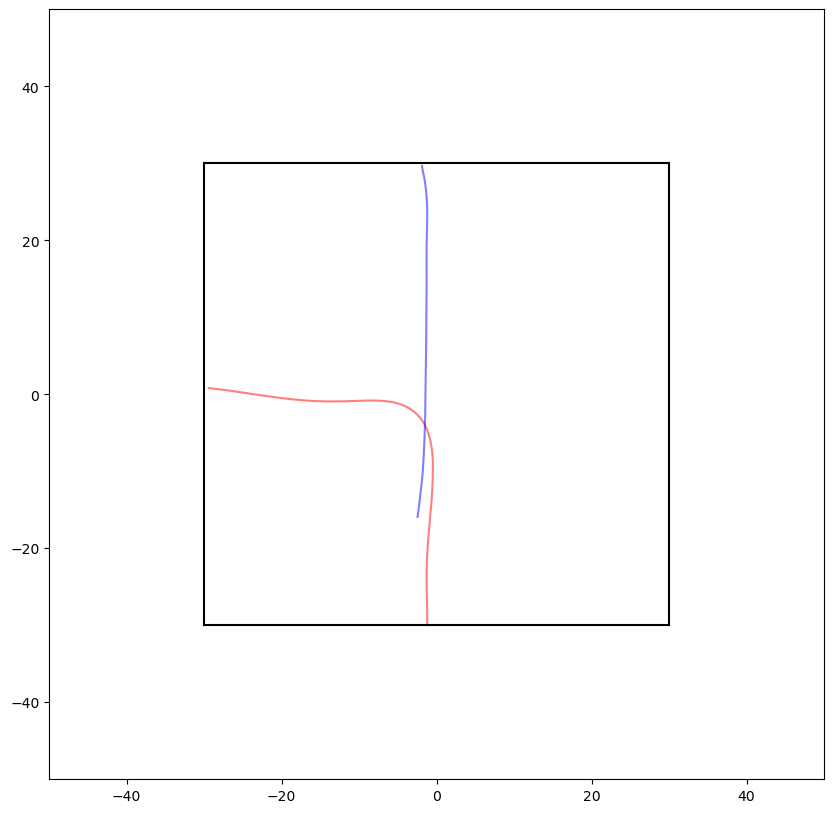

In [ ]:
GoThroughValidityOfCP(1)

In [12]:
# Convert dictionary to DataFrame
df = pandas.DataFrame(list(path_validity.items()), columns=['Path', 'Validity'])

df.to_csv(r'C:\Users\farla\Documents\Summer2023\Python\DataValidity\path_validity.csv', sep=';', index=False)